<a href="https://colab.research.google.com/github/Mohammadhsiavash/DeepL-Training/blob/main/Supervised/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Predict Stock Prices with LSTM
Goal: Use an LSTM neural network to predict the closing price of a stock using its past data.

Step 1: Install Required Libraries

In [ ]:
!pip install pandas yfinance scikit-learn matplotlib tensorflow


Step 2: Load Historical Stock Data

In [ ]:
# we use the yfinance to get data like aapl
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = yf.download('AAPL', start='2010-01-01', end='2025-01-01')
df.head()

/tmp/ipython-input-9-2604471784.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2010-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.431897,6.446623,6.382908,6.414465,493729600
2010-01-05,6.443017,6.479383,6.409055,6.449629,601904800
2010-01-06,6.340532,6.468563,6.333920,6.443017,552160000
2010-01-07,6.328809,6.371487,6.282827,6.363973,477131200
2010-01-08,6.370886,6.371487,6.283128,6.320395,447610800


In [ ]:
# Keep only the closing prices
data = df['Close']
data.dropna(inplace=True)
dataset = data.values
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3774 entries, 2010-01-04 to 2024-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    3774 non-null   float64
dtypes: float64(1)
memory usage: 59.0 KB


/tmp/ipython-input-10-499448140.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


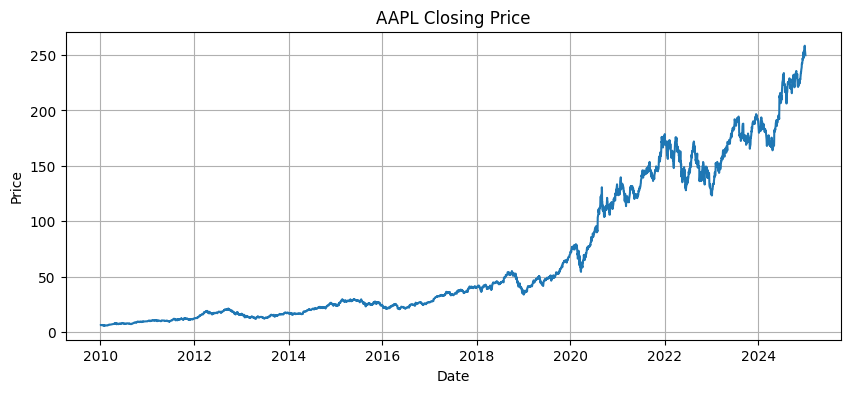

In [ ]:
# Plot the closing price
plt.figure(figsize=(10, 4))
plt.plot(data)
plt.title("AAPL Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

Step 3: Normalize the Data

In [30]:
# Normalize the Data
from sklearn.preprocessing import MinMaxScaler

Step 4: Create Time-Series Sequences

In [ ]:
import numpy as np
seq_len = 180
x = []
y = []
for i in range(seq_len, len(dataset)):
    x.append(dataset[i - seq_len:i, 0])
    y.append(dataset[i, 0])

# Convert to numpy arrays
X = np.array(x)
y = np.array(y)
# Reshape to (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (3594, 180, 1)
y shape: (3594,)


Step 5: Split into Train and Test Sets

In [ ]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

Step 6: Build and Train the LSTM Model


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile and train
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 21s 333ms/step - loss: 0.0075 - val_loss: 0.0015
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 20s 316ms/step - loss: 6.7809e-04 - val_loss: 0.0018
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 15s 345ms/step - loss: 6.2106e-04 - val_loss: 0.0014
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 19s 316ms/step - loss: 5.7104e-04 - val_loss: 0.0011
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 21s 317ms/step - loss: 5.8940e-04 - val_loss: 0.0016
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 22s 347ms/step - loss: 5.9247e-04 - val_loss: 0.0024
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 19s 316ms/step - loss: 4.1608e-04 - val_loss: 0.0024
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 20s 316ms/step - loss: 4.8104e-04 - val_loss: 0.0011
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 21s 319ms/step - loss: 5.1487e-04 - val_loss: 0.0025
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 16s 346ms/step - loss: 4.4700e-04 - val_loss: 0.0023


Step 7: Evaluate and Plot Predicons

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


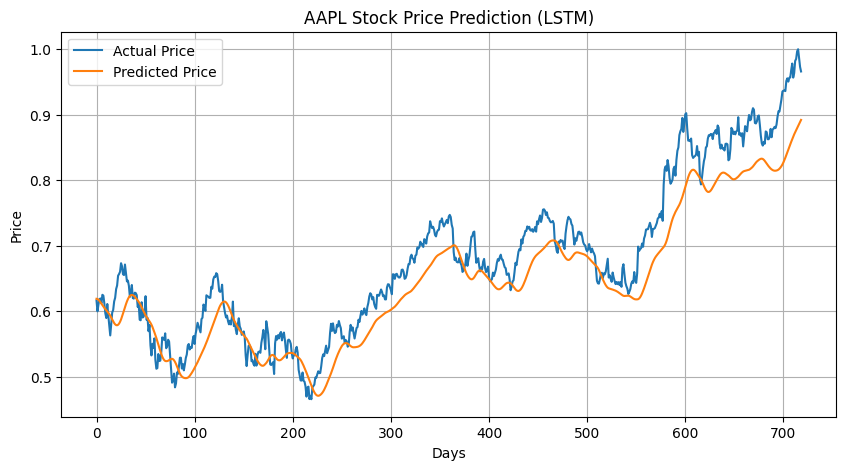

In [31]:
# Predict on test data
predictions = model.predict(X_test)
# Inverse scale the predictions
scaler = MinMaxScaler(feature_range=(0, 1))
# Re-fit the scaler on the full dataset to correctly inverse transform
scaler.fit(dataset.reshape(-1, 1))
predicted_prices = scaler.inverse_transform(predictions.reshape(-1, 1))
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))
# Plot actual vs predicted prices
plt.figure(figsize=(10, 5))
plt.plot(actual_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title('AAPL Stock Price Prediction (LSTM)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()